In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline


In [120]:
df = pd.read_csv('/Users/aimaldastagirzada/Downloads/bikes_sharing.csv')

<Axes: xlabel='casual', ylabel='Count'>

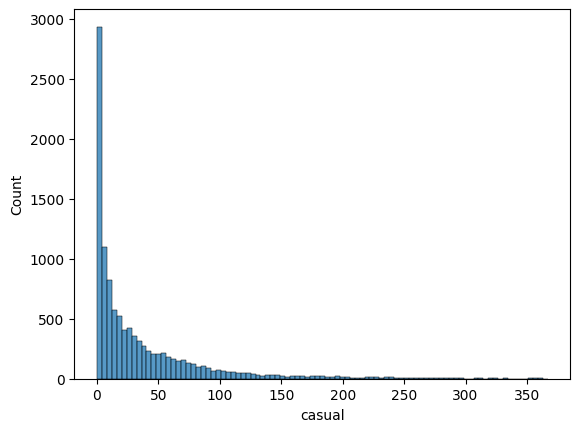

In [121]:
sns.histplot(df.casual)


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [101]:
counts = df.value_counts('weather')
print(counts)

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


In [102]:
df.index[df['weather'] == 4]

Index([5631], dtype='int64')

In [103]:
df.drop(5631, inplace=True)

In [104]:
df.casual.describe()

count    10885.000000
mean        36.024713
std         49.961943
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [105]:
def casual_category(x):
    if x >= 0 and x <= 4:
        return 0
    elif x > 4 and x <= 17:
        return 1
    elif x >17 and x <= 49:
        return 2
    elif x > 49:
        return 3

In [106]:
df['casual_cat'] = df ['casual'].apply(casual_category)

In [107]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp   
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395  \
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  casual_cat  
0        81        0.0       3          13     16           0  
1        80        0.0       8          32     40           1  
2        80        0.0       5          27     32           1  
3        75        0.0       3          10     13           0  
4        75        0.0       0           1      1           0

              datetime  season  holiday  workingday  weather  temp   atemp   
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395  \
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  casual_cat  
0        81        0.0       3          13     16           0  
1        80        0.0       8          32     40           1  
2        80        0.0       5          27     32           1  
3        75        0.0       3          10     13           0  
4        75        0.0       0           1      1           0  


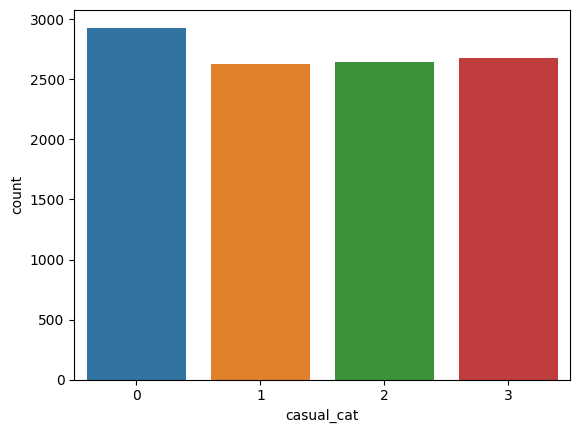

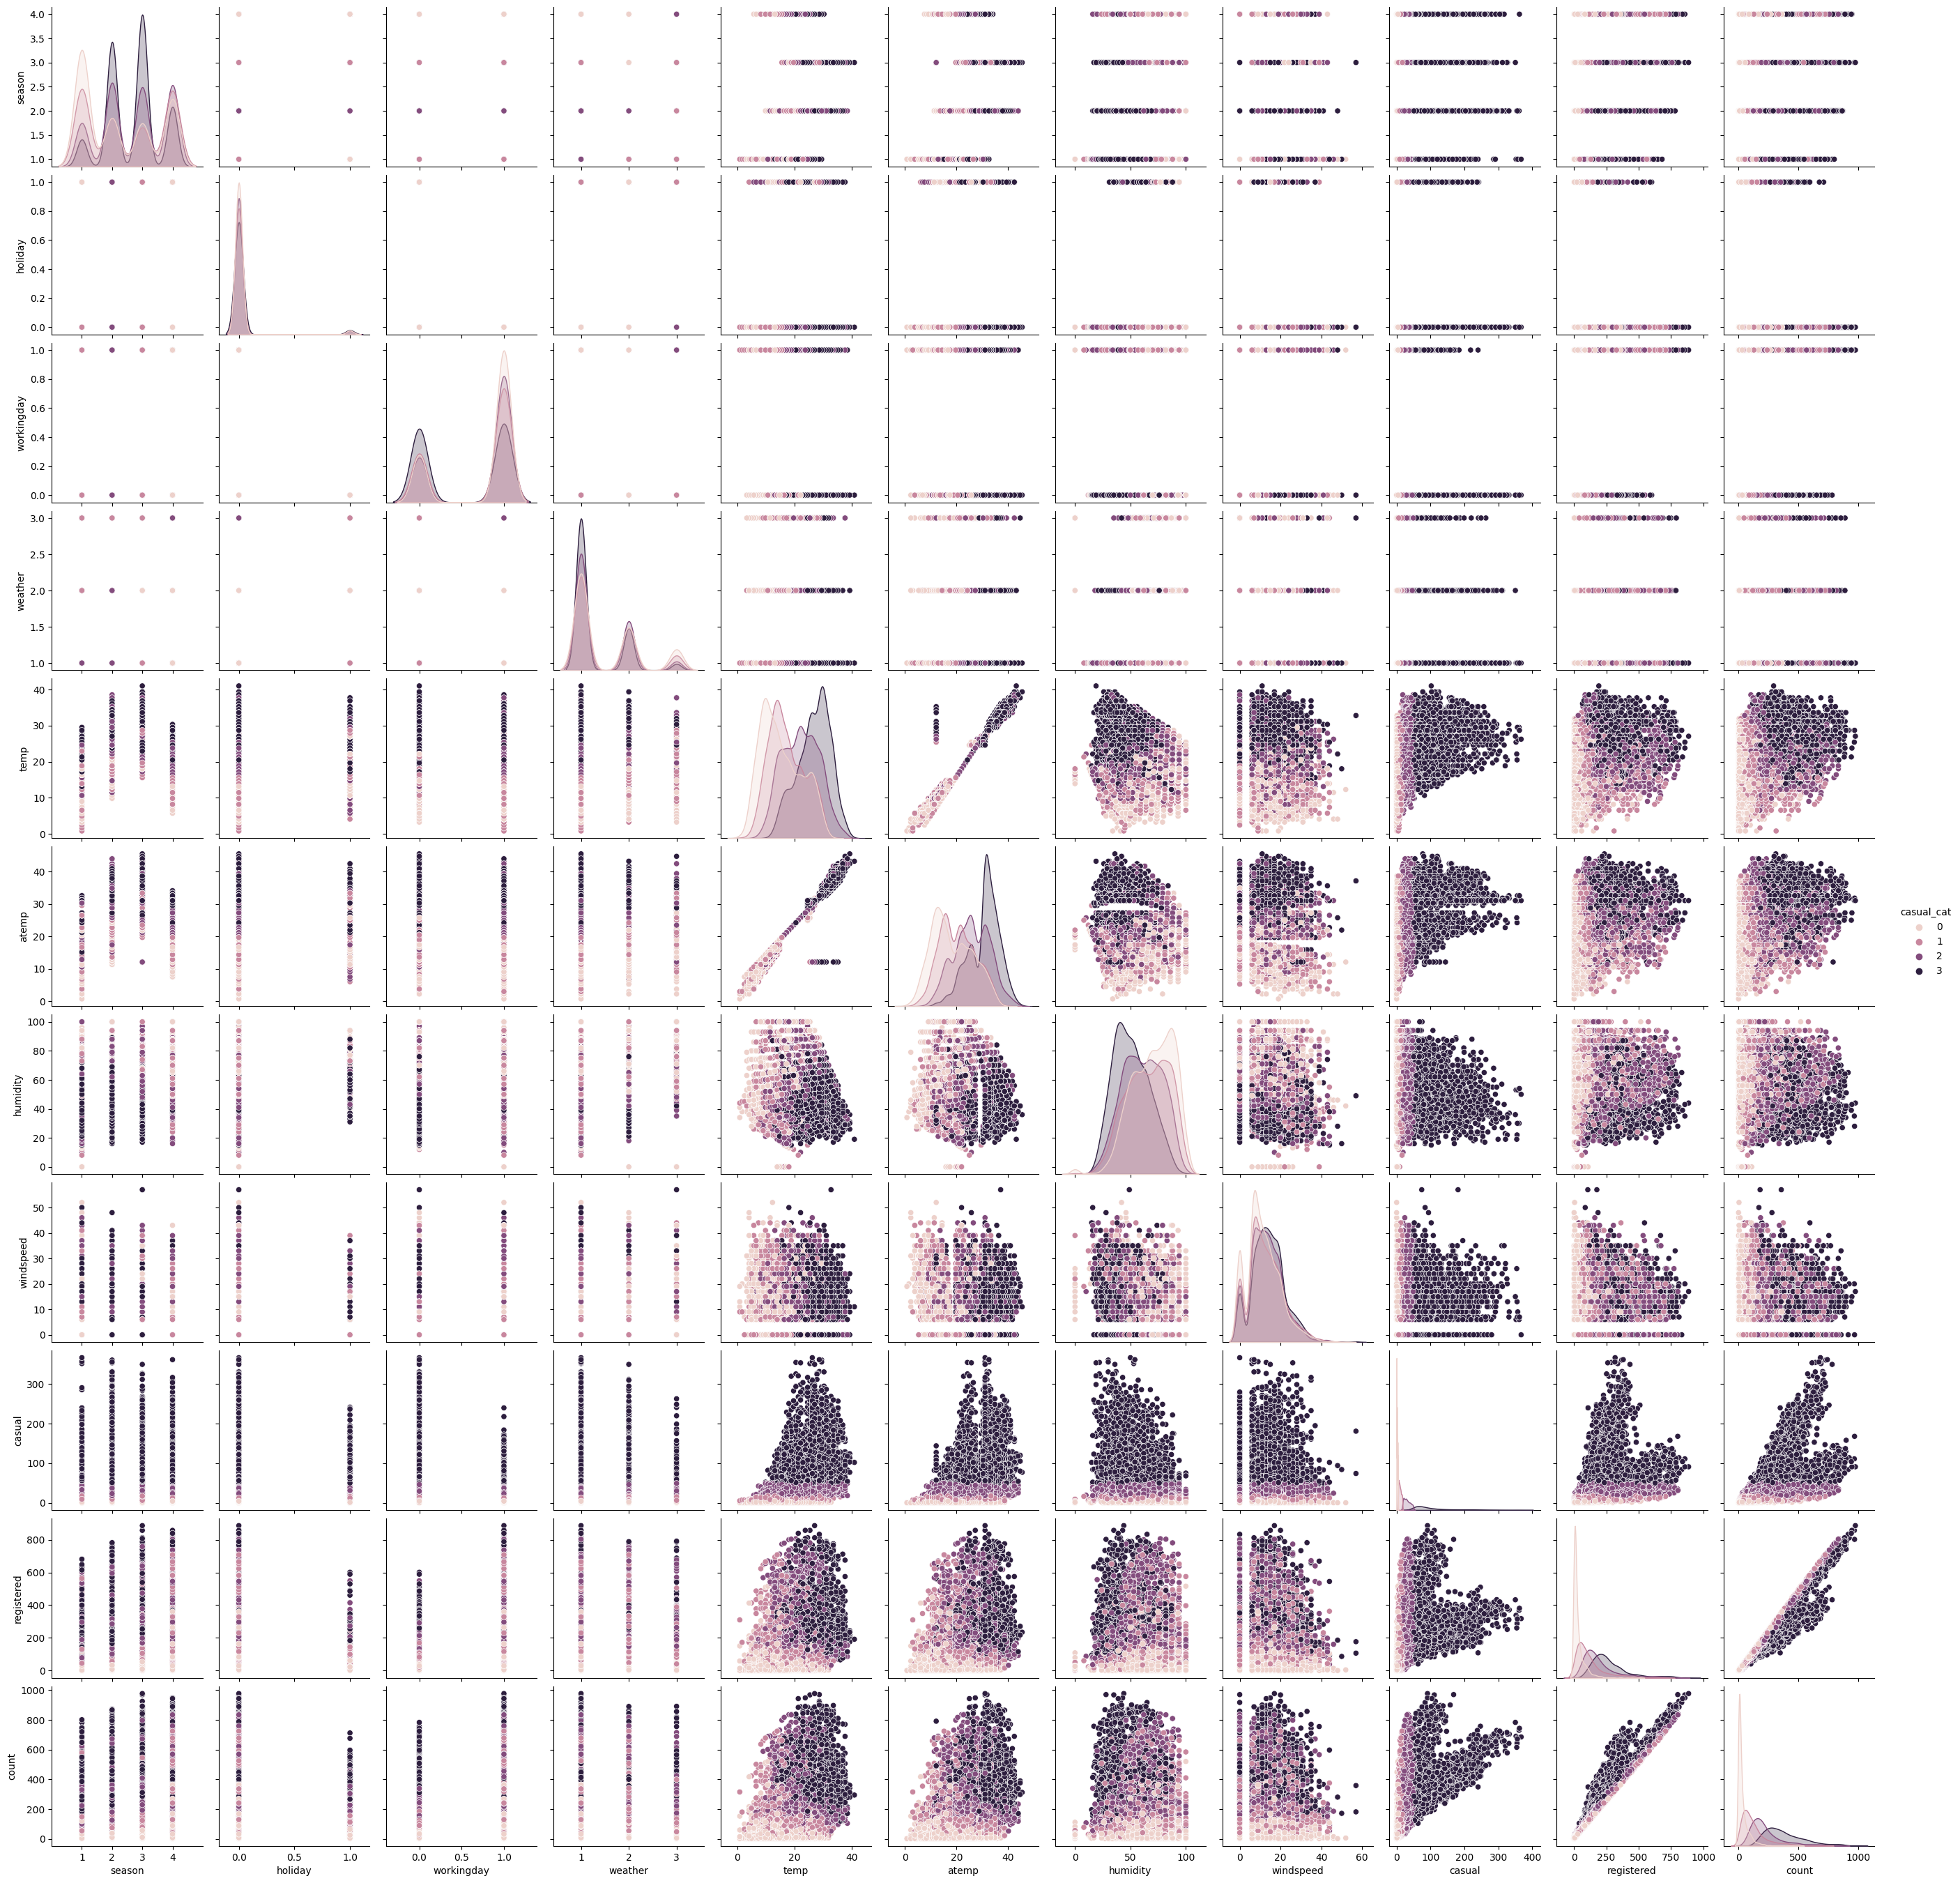

In [108]:
print(df.head())

# Display the distribution of 'Survived'
sns.countplot(x='casual_cat', data=df)
plt.show()

# More detailed exploration
sns.pairplot(df, hue='casual_cat')
plt.show()

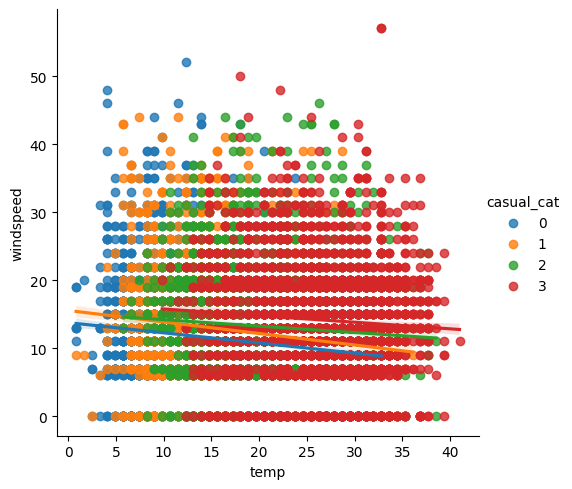

In [109]:
sns.lmplot(x='temp', y='windspeed', hue = 'casual_cat', data=df)

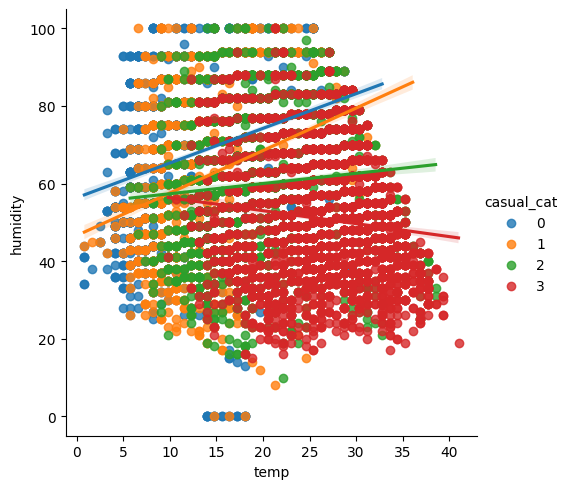

In [110]:
sns.lmplot(x='temp', y='humidity', hue = 'casual_cat', data=df)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10885 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10885 non-null  object 
 1   season      10885 non-null  int64  
 2   holiday     10885 non-null  int64  
 3   workingday  10885 non-null  int64  
 4   weather     10885 non-null  int64  
 5   temp        10885 non-null  float64
 6   atemp       10885 non-null  float64
 7   humidity    10885 non-null  int64  
 8   windspeed   10885 non-null  float64
 9   casual      10885 non-null  int64  
 10  registered  10885 non-null  int64  
 11  count       10885 non-null  int64  
 12  casual_cat  10885 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.2+ MB


In [112]:
cat_columns = ['holiday', 'season', 'workingday', 'weather']
num_columns = ['temp','humidity', 'atemp', 'windspeed', 'registered', 'count']
target = 'casual_cat'

In [113]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [114]:

X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)


In [115]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [116]:
x_train_transformed.shape

(8708, 17)

In [117]:
x_test_transformed.shape

(2177, 17)

In [118]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [119]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_transformed, y_train)
y_pred = knn.predict(X_test_transformed)
print(f1_score(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].